In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from collections import Counter
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score, roc_curve,  auc

In [54]:
employee_data =  pd.read_csv('IBM.csv', sep=',')
employee_data.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [55]:
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 149.4+ KB


In [56]:
print(employee_data.isnull().sum())
print(employee_data.isna().sum())

Age                        0
Attrition                  0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EnvironmentSatisfaction    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
WorkLifeBalance            0
YearsAtCompany             0
dtype: int64
Age                        0
Attrition                  0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EnvironmentSatisfaction    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
WorkLifeBalance            0
YearsAtCompany             0
dtype: int64


In [57]:
employee_data.duplicated().sum()

0

In [58]:
employee_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.0,60.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0
Education,1470.0,2.912925,1.024165,1.0,2.0,3.0,4.0,5.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.0,3.0,4.0,4.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.0,3.0,4.0,4.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.0,19999.0
NumCompaniesWorked,1470.0,2.693197,2.498009,0.0,1.0,2.0,4.0,9.0
WorkLifeBalance,1470.0,2.761224,0.706476,1.0,2.0,3.0,3.0,4.0
YearsAtCompany,1470.0,7.008163,6.126525,0.0,3.0,5.0,9.0,40.0


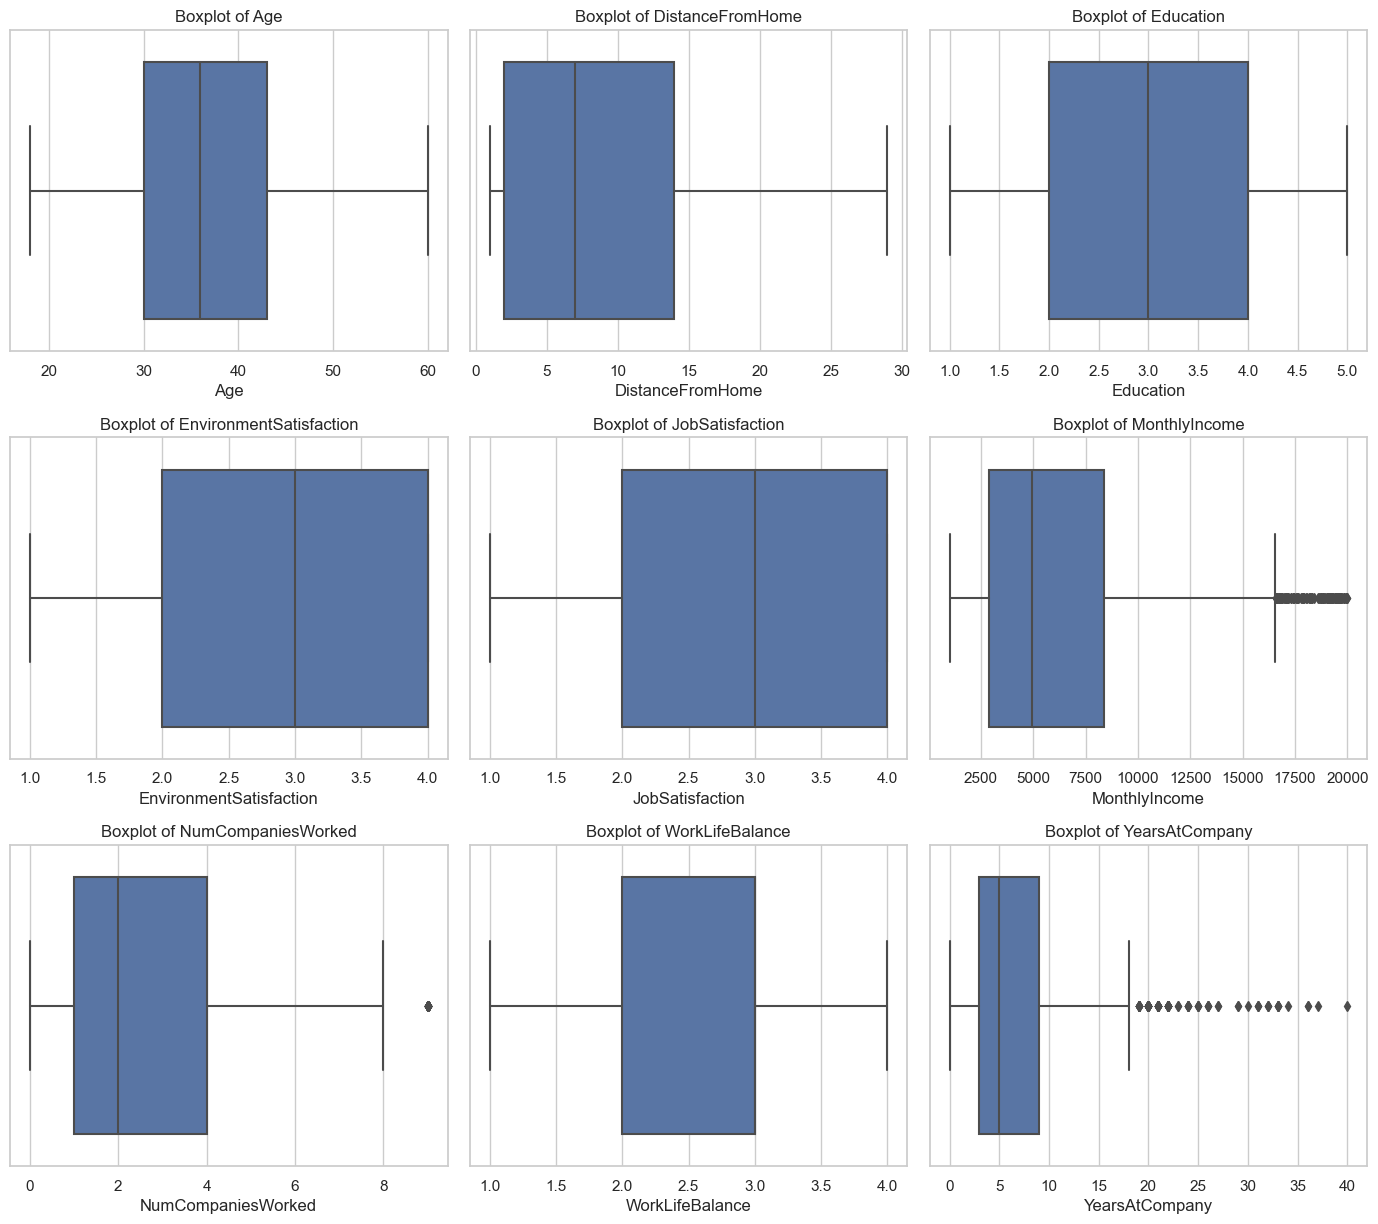

In [59]:
sns.set(style="whitegrid")
# Visualize the distribution of numerical values
numerical_cols = employee_data.select_dtypes(include=['int64', 'float64']).columns
num_plots = len(numerical_cols)
num_rows = (num_plots // 3) + 1
plt.figure(figsize=(14, 4 * num_rows))

for i, column in enumerate(numerical_cols, 1):
    plt.subplot(num_rows, 3, i)
    sns.boxplot(x=employee_data[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

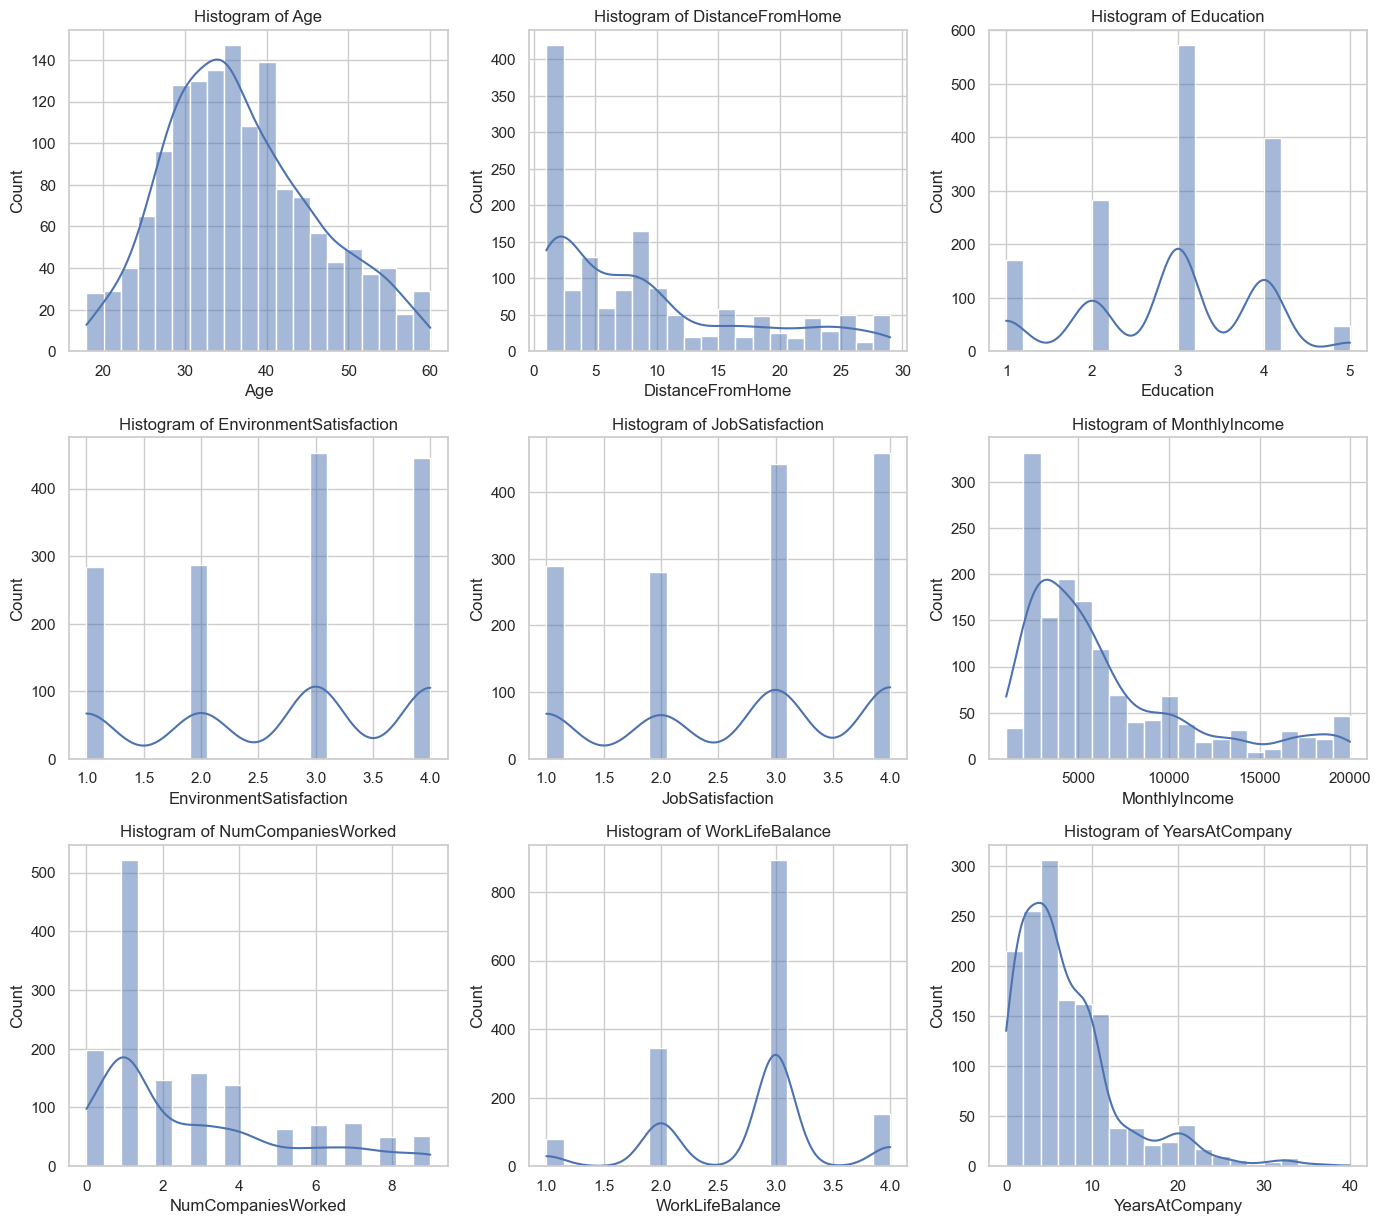

In [60]:
sns.set(style="whitegrid")

# Visualize the distribution of numerical values
numerical_cols = employee_data.select_dtypes(include=['int64', 'float64']).columns

num_plots = len(numerical_cols)
num_rows = (num_plots // 3) + 1
plt.figure(figsize=(14, 4 * num_rows))
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(num_rows, 3, i)
    sns.histplot(employee_data[column], bins=20, kde=True)
    plt.title(f'Histogram of {column}')
plt.tight_layout()
plt.show()

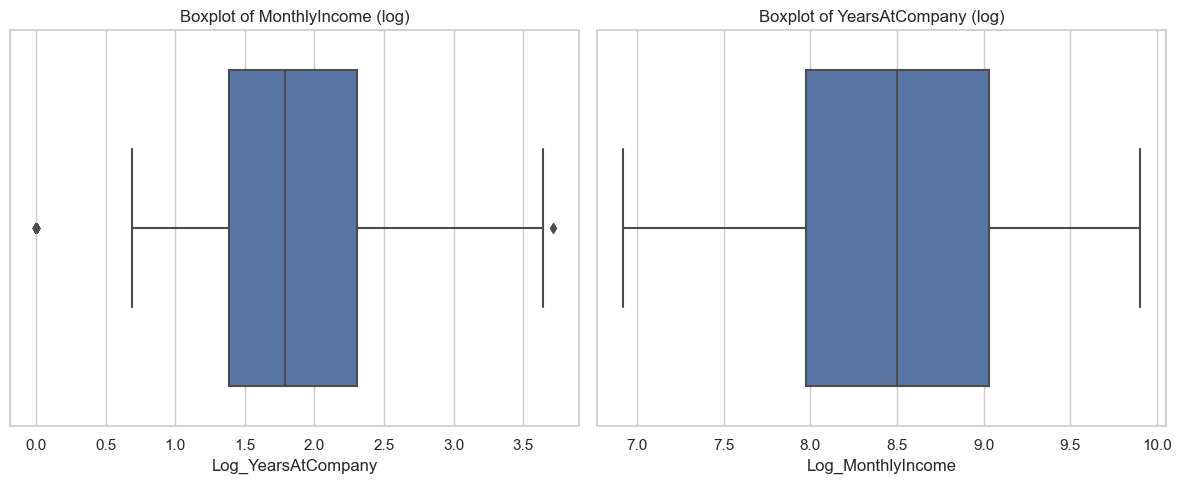

In [61]:
employee_data['Log_YearsAtCompany'] = np.log1p(employee_data['YearsAtCompany'])
employee_data['Log_MonthlyIncome'] = np.log1p(employee_data['MonthlyIncome'])
employee_data = employee_data.drop(['YearsAtCompany','MonthlyIncome'], axis=1)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=employee_data['Log_YearsAtCompany'])
plt.title('Boxplot of MonthlyIncome (log)')

plt.subplot(1, 2, 2)
sns.boxplot(x= employee_data['Log_MonthlyIncome'])
plt.title('Boxplot of YearsAtCompany (log)')

plt.tight_layout()
plt.show()

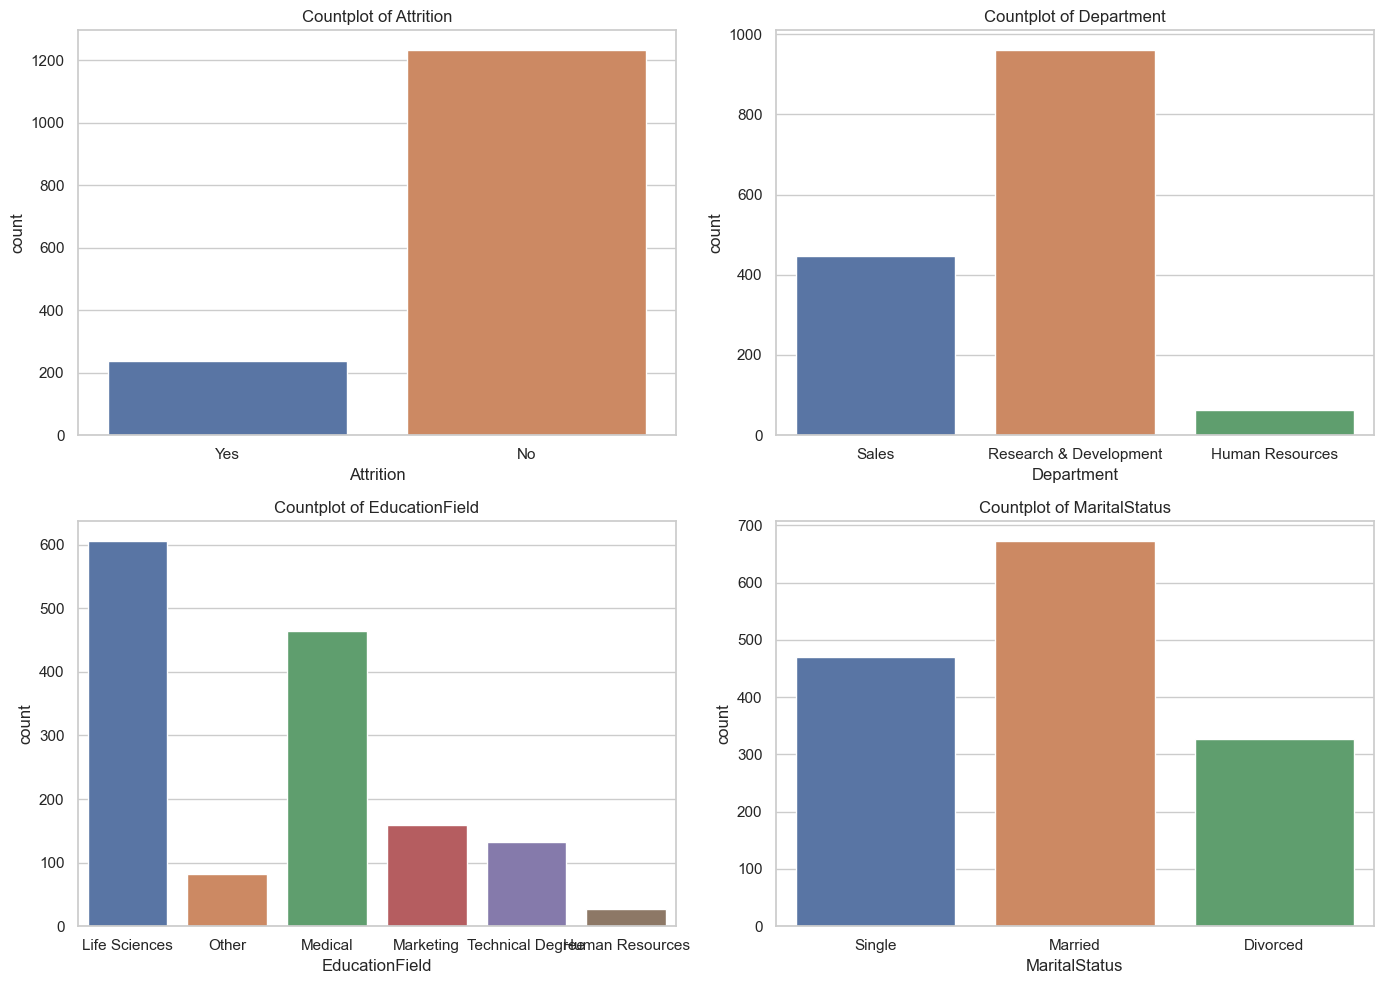

In [62]:
sns.set(style="whitegrid")
categorical_cols = employee_data.select_dtypes(include=['object']).columns

# Countplot for individual categorical columns
plt.figure(figsize=(14, 10))
for i, column in enumerate(categorical_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=employee_data[column])
    plt.title(f'Countplot of {column}')
plt.tight_layout()
plt.show()

In [63]:
employee_data['Attrition'] = employee_data['Attrition'].map({'No': 0, 'Yes': 1})
employee_data.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,NumCompaniesWorked,WorkLifeBalance,Log_YearsAtCompany,Log_MonthlyIncome
0,41,1,Sales,1,2,Life Sciences,2,4,Single,8,1,1.945910,8.698514
1,49,0,Research & Development,8,1,Life Sciences,3,2,Married,1,3,2.397895,8.543056
2,37,1,Research & Development,2,2,Other,4,3,Single,6,3,0.000000,7.645398
3,33,0,Research & Development,3,4,Life Sciences,4,3,Married,1,3,2.197225,7.975908
4,27,0,Research & Development,2,1,Medical,1,2,Married,9,3,1.098612,8.151622


In [64]:
categorical_columns = ['EducationField', 'Department', 'MaritalStatus']
data_to_encode = employee_data[categorical_columns]
encoder = OneHotEncoder(sparse_output=False, drop='first')  # 'drop' parameter is set to 'first' to avoid multicollinearity
encoded_data = encoder.fit_transform(data_to_encode)
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))
# Replace the original categorical columns with the encoded columns in the original DataFrame
employee_data = pd.concat([employee_data, encoded_df], axis=1)
employee_data = employee_data.drop(categorical_columns, axis=1)
employee_data.head()

,Age,Attrition,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,NumCompaniesWorked,WorkLifeBalance,Log_YearsAtCompany,Log_MonthlyIncome,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Department_Research & Development,Department_Sales,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1,2,2,4,8,1,1.945910,8.698514,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,49,0,8,1,3,2,1,3,2.397895,8.543056,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,37,1,2,2,4,3,6,3,0.000000,7.645398,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,33,0,3,4,4,3,1,3,2.197225,7.975908,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,27,0,2,1,1,2,9,3,1.098612,8.151622,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [65]:
summary_stats = employee_data.describe().T
summary_stats

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.000000,30.000000,36.000000,43.000000,60.000000
Attrition,1470.0,0.161224,0.367863,0.000000,0.000000,0.000000,0.000000,1.000000
DistanceFromHome,1470.0,9.192517,8.106864,1.000000,2.000000,7.000000,14.000000,29.000000
Education,1470.0,2.912925,1.024165,1.000000,2.000000,3.000000,4.000000,5.000000
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.000000,2.000000,3.000000,4.000000,4.000000
JobSatisfaction,1470.0,2.728571,1.102846,1.000000,2.000000,3.000000,4.000000,4.000000
NumCompaniesWorked,1470.0,2.693197,2.498009,0.000000,1.000000,2.000000,4.000000,9.000000
WorkLifeBalance,1470.0,2.761224,0.706476,1.000000,2.000000,3.000000,3.000000,4.000000
Log_YearsAtCompany,1470.0,1.811729,0.756870,0.000000,1.386294,1.791759,2.302585,3.713572
Log_MonthlyIncome,1470.0,8.552752,0.664313,6.917706,7.976595,8.501061,9.033603,9.903488


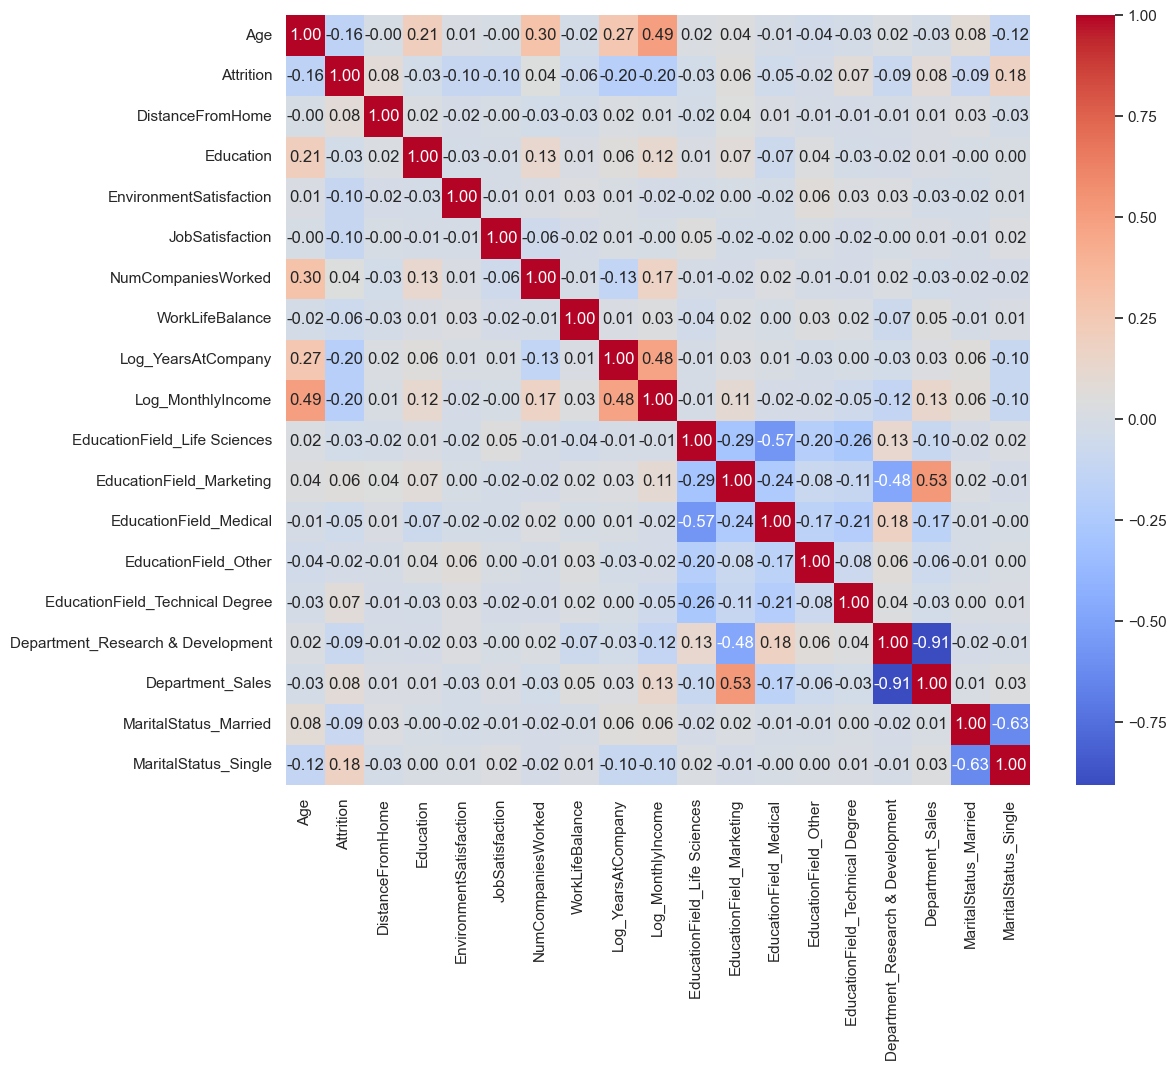

In [66]:
correlation_matrix = employee_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [67]:
corr_matrix = employee_data.corr()['Attrition'].abs().sort_values(ascending=False)
corr_matrix

Attrition                            1.000000
Log_YearsAtCompany                   0.198467
Log_MonthlyIncome                    0.198201
MaritalStatus_Single                 0.175419
Age                                  0.159205
JobSatisfaction                      0.103481
EnvironmentSatisfaction              0.103369
MaritalStatus_Married                0.090984
Department_Research & Development    0.085293
Department_Sales                     0.080855
DistanceFromHome                     0.077924
EducationField_Technical Degree      0.069355
WorkLifeBalance                      0.063939
EducationField_Marketing             0.055781
EducationField_Medical               0.046999
NumCompaniesWorked                   0.043494
EducationField_Life Sciences         0.032703
Education                            0.031373
EducationField_Other                 0.017898
Name: Attrition, dtype: float64

In [68]:
X = employee_data.drop('Attrition',axis=1)
y = employee_data['Attrition']

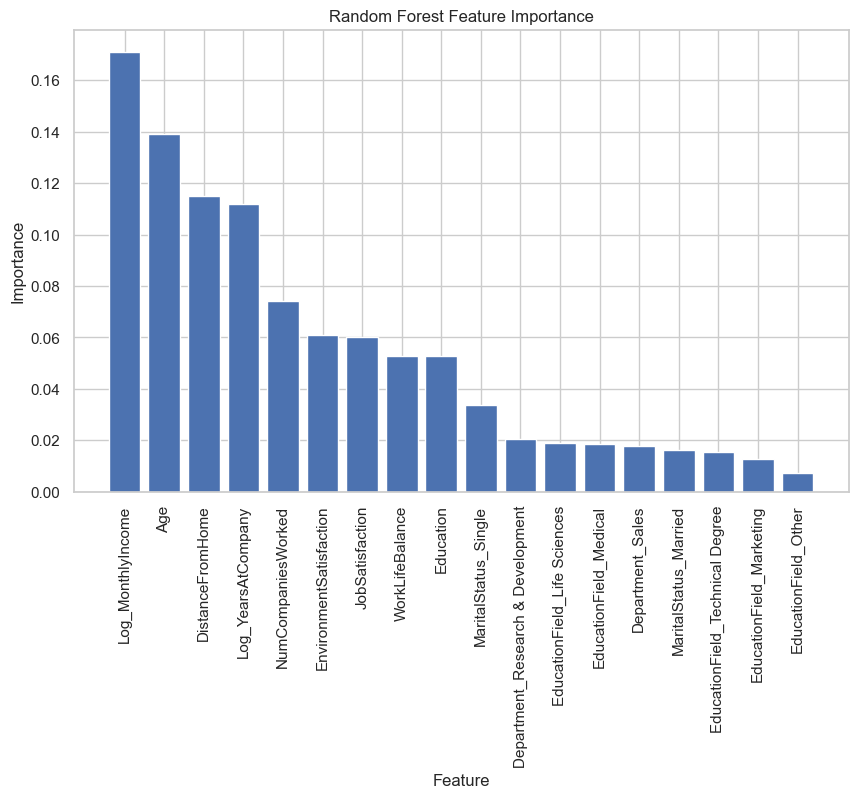

Log_MonthlyIncome          0.170998
Age                        0.139058
DistanceFromHome           0.115150
Log_YearsAtCompany         0.111975
NumCompaniesWorked         0.074371
EnvironmentSatisfaction    0.060792
JobSatisfaction            0.060166
WorkLifeBalance            0.052901
dtype: float64


In [69]:
# Assuming X_train, y_train are your training data
rf_model = RandomForestClassifier()
rf_model.fit(X, y)

# Get feature importances
feature_importances1 = rf_model.feature_importances_
indices = feature_importances1.argsort()[::-1]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importances1[indices])
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importance')
plt.show()

feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)
top_features = feature_importances.head(8)
print(top_features)

In [70]:
top_features= ['Log_MonthlyIncome','Age','Log_YearsAtCompany','DistanceFromHome','NumCompaniesWorked','EnvironmentSatisfaction','JobSatisfaction','WorkLifeBalance']
X = employee_data[top_features]

In [71]:
# Assuming 'X' is your feature matrix and 'y' is your target variable
scaler = StandardScaler()
final_X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(final_X_scaled, y, test_size=0.3, random_state=42)

# Logistic Regression
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
y_pred_logreg_train = logreg_model.predict(X_train)
y_pred_logreg_test = logreg_model.predict(X_test)
accuracy_logreg_train = accuracy_score(y_train, y_pred_logreg_train)
accuracy_logreg_test = accuracy_score(y_test, y_pred_logreg_test)
conf_matrix = confusion_matrix(y_test, y_pred_logreg_test)
print(f'Confusion Matrix:\n{conf_matrix}')
print("Logistic Regression Train Accuracy :", accuracy_logreg_train)
print("Logistic Regression Test Accuracy:", accuracy_logreg_test)
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_logreg_test))

# K Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn_train = knn_model.predict(X_train)
y_pred_knn_test = knn_model.predict(X_test)
accuracy_knn_train = accuracy_score(y_train, y_pred_knn_train)
accuracy_knn_test = accuracy_score(y_test, y_pred_knn_test)
conf_matrix = confusion_matrix(y_test, y_pred_knn_test)
print(f'Confusion Matrix:\n{conf_matrix}')
print("KNeighbors Train Accuracy:", accuracy_knn_train)
print("KNeighbors Test Accuracy:", accuracy_knn_test)
print("Classification Report for Decision Tree:")
print(classification_report(y_test, y_pred_knn_test))

# Gradient Boosting
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train, y_train)
y_train_gb_pred = gb_classifier.predict(X_train)
y_test_gb_pred = gb_classifier.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_gb_pred)
test_accuracy = accuracy_score(y_test, y_test_gb_pred)
conf_matrix = confusion_matrix(y_test, y_test_gb_pred)
print(f'Confusion Matrix:\n{conf_matrix}')
print("Gradient Boosting Train Accuracy:", train_accuracy)
print("Gradient Boosting Test Accuracy:", test_accuracy)
print("Classification Report for Gradient Boosting:")
print(classification_report(y_test, y_test_gb_pred))

Confusion Matrix:
[[376   4]
 [ 57   4]]
Logistic Regression Train Accuracy : 0.8377065111758989
Logistic Regression Test Accuracy: 0.8616780045351474
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.87      0.99      0.92       380
           1       0.50      0.07      0.12        61

    accuracy                           0.86       441
   macro avg       0.68      0.53      0.52       441
weighted avg       0.82      0.86      0.81       441

Confusion Matrix:
[[368  12]
 [ 56   5]]
KNeighbors Train Accuracy: 0.8658892128279884
KNeighbors Test Accuracy: 0.8458049886621315
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       380
           1       0.29      0.08      0.13        61

    accuracy                           0.85       441
   macro avg       0.58      0.53      0.52       441
weighted avg       0.79      0

Counter({1: 1233, 0: 1233})


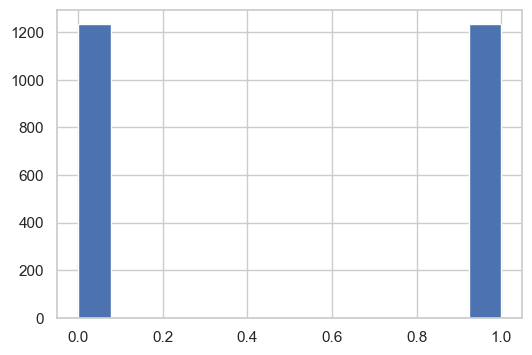

In [72]:
smote = BorderlineSMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)
print(Counter(y_resampled))

plt.figure(figsize=(6, 4))
plt.hist(y_resampled, bins='auto')
plt.show()

In [73]:
X = X_resampled
y = y_resampled
scaler = StandardScaler()
final_X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(final_X_scaled, y, test_size=0.3, random_state=42)

# Logistic Regression
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
y_pred_logreg_train = logreg_model.predict(X_train)
y_pred_logreg_test = logreg_model.predict(X_test)
accuracy_logreg_train = accuracy_score(y_train, y_pred_logreg_train)
accuracy_logreg_test = accuracy_score(y_test, y_pred_logreg_test)
conf_matrix = confusion_matrix(y_test, y_pred_logreg_test)
print(f'Confusion Matrix:\n{conf_matrix}')
print("Logistic Regression Train Accuracy :", accuracy_logreg_train)
print("Logistic Regression Test Accuracy:", accuracy_logreg_test)
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_logreg_test))

# K Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn_train = knn_model.predict(X_train)
y_pred_knn_test = knn_model.predict(X_test)
accuracy_knn_train = accuracy_score(y_train, y_pred_knn_train)
accuracy_knn_test = accuracy_score(y_test, y_pred_knn_test)
conf_matrix = confusion_matrix(y_test, y_pred_knn_test)
print(f'Confusion Matrix:\n{conf_matrix}')
print("KNeighbors Train Accuracy:", accuracy_knn_train)
print("KNeighbors Test Accuracy:", accuracy_knn_test)
print("Classification Report for Decision Tree:")
print(classification_report(y_test, y_pred_knn_test))

# Gradient Boosting
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train, y_train)
y_train_gb_pred = gb_classifier.predict(X_train)
y_test_gb_pred = gb_classifier.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_gb_pred)
test_accuracy = accuracy_score(y_test, y_test_gb_pred)
conf_matrix = confusion_matrix(y_test, y_test_gb_pred)
print(f'Confusion Matrix:\n{conf_matrix}')
print("Gradient Boosting Train Accuracy:", train_accuracy)
print("Gradient Boosting Test Accuracy:", test_accuracy)
print("Classification Report for Gradient Boosting:")
print(classification_report(y_test, y_test_gb_pred))

Confusion Matrix:
[[278  91]
 [103 268]]
Logistic Regression Train Accuracy : 0.7381228273464658
Logistic Regression Test Accuracy: 0.7378378378378379
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.73      0.75      0.74       369
           1       0.75      0.72      0.73       371

    accuracy                           0.74       740
   macro avg       0.74      0.74      0.74       740
weighted avg       0.74      0.74      0.74       740

Confusion Matrix:
[[272  97]
 [ 47 324]]
KNeighbors Train Accuracy: 0.8696407879490151
KNeighbors Test Accuracy: 0.8054054054054054
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.85      0.74      0.79       369
           1       0.77      0.87      0.82       371

    accuracy                           0.81       740
   macro avg       0.81      0.81      0.80       740
weighted avg       0.81      0

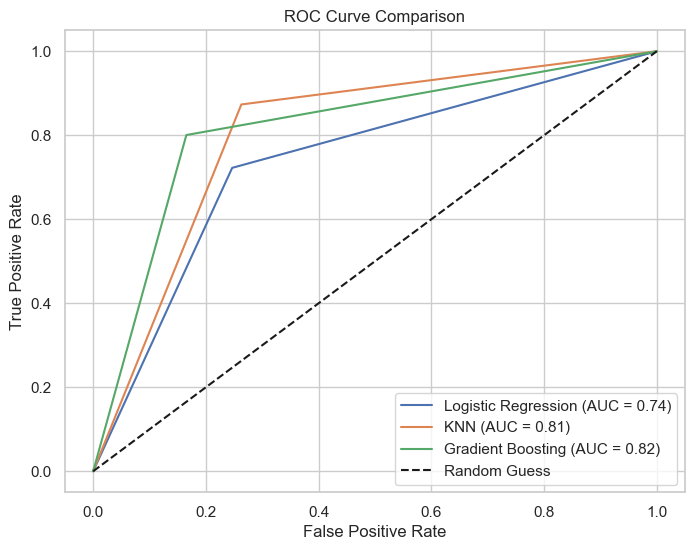

In [75]:
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, y_pred_logreg_test)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_knn_test)
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_test_gb_pred)

roc_auc_logistic = auc(fpr_logistic, tpr_logistic)
roc_auc_knn = auc(fpr_knn, tpr_knn)
roc_auc_rf = auc(fpr_gb, tpr_gb)

# Plotting
plt.figure(figsize=(8, 6))

# ROC curve plot
plt.plot(fpr_logistic, tpr_logistic, label=f'Logistic Regression (AUC = {roc_auc_logistic:.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {roc_auc_knn:.2f})')
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {roc_auc_rf:.2f})')

# Diagonal line for reference
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()

plt.show()

In [76]:
# Define the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier()

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3]
}

grid_search = GridSearchCV(estimator=gb_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
y_test_pred = grid_search.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Display the results
print(f"Best Hyperparameters: {best_params}")
print(f"Test Accuracy with Best Model: {test_accuracy:.4f}")

Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 150}
Test Accuracy with Best Model: 0.8595
